**EXPLORATORY DATA ANALYSIS (EDA)**


**1) Import Data**

Getting the data in the first place is a big challenge for data scientists. Luckily, Kaggle gives us a nice data set to use for the competition so we are just going to import the CSV file using pandas.

From Kaggle we get 2 data sets : "train" and "test". The test set is there only to validate our predictive model at the end of the study but we are going to import it at the same time so it's done.

In [1]:
import pandas as pd 
import numpy as np

train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

Usually the first thing we want to do is have a quick glance at our data. For this we have the attribute pd.shape and 2 basic methods : pd.head() and pd.describe()

In [2]:
train.shape

(891, 12)

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe(include = 'all') ## pro tip : add "include = "all"" to show the non numerical columns

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Richard, Mr. Emile",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Alright, so far we know that our data set has 891 rows and 12 columns :

* PassengerId
* Survived 
* Pclass: the passenger class. It has three possible values: 1,2,3
* The Name
* The Sex
* The Age
* SibSp: number of siblings and spouses traveling with the passenger
* Parch: number of parents and children traveling with the passenger
* The ticket number
* The ticket Fare
* The cabin number
* The embarkation. It has three possible values S,C,Q

We can see that we have only 204 out of 891 values for Cabin, that's not enough to take into consideration so we are going to drop this feature. Also, we can see from train.head() that the ticket number and PassengerId features seem useless so we're going to delete them aswell. 

We also have missing values for Age. We could try to guess the missing ages based on other features but for the EDA we're just going to drop the rows with a NaN value using pd.dropna()

In [5]:
train = train.drop(['Ticket','Cabin','PassengerId'], axis=1)
train = train.dropna()
train['Sex'] = train['Sex'].map({'male':1,'female':0})
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S


Now we're going to have a look at our data using graphs using  matplotlib and seaborn :
Let's start with our Survived feature distribution : 

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

Let's start with our Survived feature distribution : 

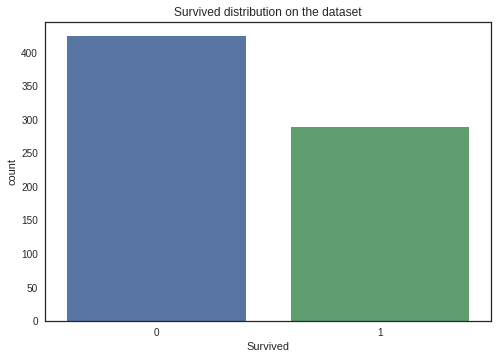

In [7]:
g = sns.countplot("Survived", data = train)
plt.title("Survived distribution on the dataset")
sns.plt.show()

We can see that in our dataset more people died than survived on the Titanic. 

Next we are going to create a correlation heatmap. Correlation is a statistical technique that is used to measure and describe the strength and direction of the relationship between two variables. 

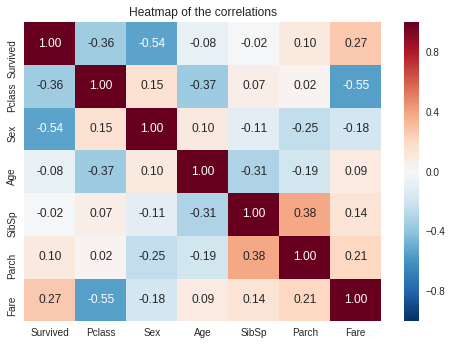

In [8]:
g = sns.heatmap(train.corr(), annot=True, fmt=".2f")
plt.title("Heatmap of the correlations")
sns.plt.show()

Here we can see positive correlations between :
* ** Survived and Fare **: People who paid more for their ticket tend to have a higher Survived rate.
* **Parch and Sibsp** : Sibsp is the number of siblings +spouses and Parch is the number of parents and children so it makes sense that the 2 are correlated.
* **Parch and Fare** : People who have a big family pay more for their ticket, because usually if you can afford to travel with a big family you can afford an expensive ticket.

And negative correlations between :
* **Survived and Sex** : Men have a Survived rate way lower than women, thus "Women and child first!"
* **Survived and Pclass** : Our classes go from 1 to 3 with 3 being the cheapest and 1 the most expensive. Here a negative correlation means that people who are in the third class tend to have a lower Survived rate. 
* **Pclass and Fare** : The class is determined by the price of the ticket.
* **Pclass and Age** : The older people tend to be in the most expensive classes.



Let's have a more precize look of these features to confirm our insuptions : 



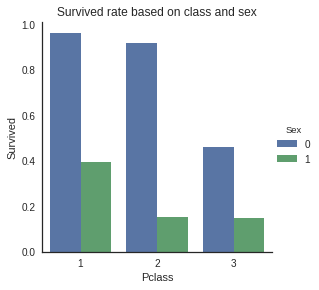

In [9]:
g = sns.factorplot("Pclass","Survived", hue="Sex", kind = "bar", data=train, ci = None)
plt.title("Survived rate based on class and sex")
sns.plt.show()

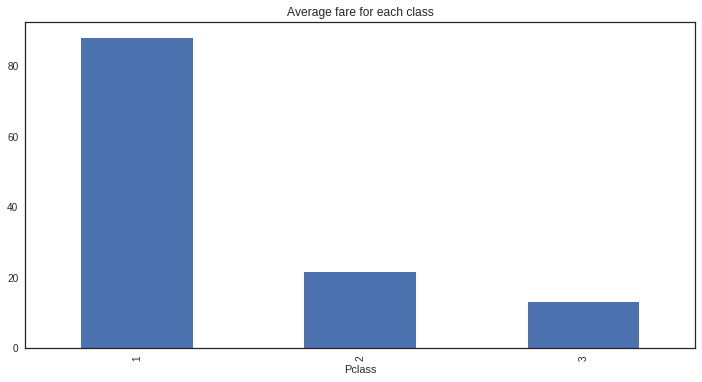

In [10]:
train.groupby('Pclass').mean()['Fare'].plot(kind='bar',figsize=(12,6))
plt.title("Average fare for each class")
sns.plt.show()

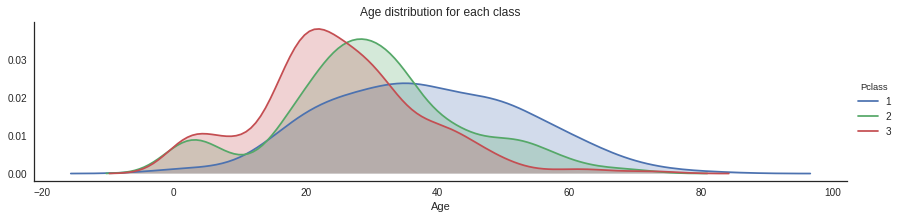

In [11]:
fig = sns.FacetGrid(train,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
plt.title("Age distribution for each class")
fig.add_legend()
sns.plt.show()

Alright, we took a glance at the data and spotted some interesting correlations. However, we couldn't manage to analyze more complicated features like the names because these required further processing. This is why in the next part we'll focus on the ways to transform these features to fit our machine learning algorithms.

****FEATURE ENGINEERING****

Feature engineering is the process of reshaping, transforming or creating new features based on the previous ones. We're going to do it on both data sets, so to save time we'll combine the train and test set together :

In [12]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

data = train.append(test)
data.shape

(1309, 12)

In [13]:
data.describe(include = "all")

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309.000000,1309,1309.000000,891.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Kelly, Mr. James",NaN,NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,655.000000,2.294882,NaN,0.498854,0.383838,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,378.020061,0.837836,NaN,1.041658,0.486592,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,1.000000,NaN,0.000000,0.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,328.000000,2.000000,NaN,0.000000,0.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,655.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,982.000000,3.000000,NaN,1.000000,1.000000,NaN


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


For the same reason as mentionned at the begining, we're going to drop our useless / unusable features : 

In [15]:
data = data.drop(['Survived','Ticket','Cabin','PassengerId'], axis=1)

Processing Name : if we look closely at the Name feature, we can see that each name has title in it : for example "Braund, Mr. Owen Harris" has the title "Mr". We can group these title into categories  and create a new feature. 

So first, we're breaking each name using the first "," and the "." and extract the title. There's a lot of them so we then proceed to group them into 5 categories :
* Officer
* Royalty
* Mrs
* Miss
* Master

In [16]:
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'
    
Title_Map = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"

                        }
    
data["Title"] = data["Name"].apply(get_title).map(Title_Map)

We now have a Title for each of our passenger. 

Processing Age : We're missing a lot of value for our Age feature and we can't just drop the columns with a missing value because it would hurt our modele accuracy to much. We could just use the mean or the median of all the ages but we can do better here.
We can group our passengers by sex, class and our newly created feature title and get the median age of each group, and then replace our missing values based on the other features for each passenger


In [17]:
data["Age"] = data.groupby(['Sex','Pclass','Title'])['Age'].transform(lambda x: x.fillna(x.median()))
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
Age         1309 non-null float64
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Title       1309 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 102.3+ KB


This single line of code does all the job, if you have trouble understanding it you can check the well made documentation here : https://pandas.pydata.org/pandas-docs/stable/groupby.html

Processing title :

Modeles usually need  numerical variables, this is why when we have categorical variables we need to transform them.
One way to do it is with dummy encoding. For example here we have one categorical feature "Title" with 5 categories as strings. The function pd.get_dummies will create a column for each categorie and fill it with 0 and 1, 1 meaning that the passenger is in this category.

In [18]:
titles_dummies = pd.get_dummies(data['Title'],prefix='Title')
data = pd.concat([data,titles_dummies],axis=1)

data.drop("Name", axis=1, inplace = True)
data.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Title,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,22.0,S,7.2500,0,3,male,1,Mr,0,0,1,0,0,0
1,38.0,C,71.2833,0,1,female,1,Mrs,0,0,0,1,0,0
2,26.0,S,7.9250,0,3,female,0,Miss,0,1,0,0,0,0
3,35.0,S,53.1000,0,1,female,1,Mrs,0,0,0,1,0,0
4,35.0,S,8.0500,0,3,male,0,Mr,0,0,1,0,0,0


Processing Fare : 
We have a few missing values here to we're just going to fill them with the mean

In [19]:
data.Fare.fillna(data.Fare.mean(), inplace=True)

Processing Embarked :
We also have a few missing values so we're going to replace it with the most frequent one : S, and then get the dummy columns.

In [20]:
data.Embarked.fillna('S', inplace=True)
Embarked_dummies = pd.get_dummies(data['Embarked'],prefix='Embarked')
data = pd.concat([data,Embarked_dummies],axis=1)

Processing Parch and Sibsp :
We're going to use Parch and Sibsp  to create a new one called "Familysize" that will basicly be the addition of these 2 features plus the passenger.
Then we will break it into 3 categories : singleton (passenger alone), small family and large family.

In [21]:
data['FamilySize'] = data['Parch'] + data['SibSp'] + 1

data['Singleton'] = data['FamilySize'].map(lambda s: 1 if s == 1 else 0)
data['SmallFamily'] = data['FamilySize'].map(lambda s: 1 if 2<=s<=4 else 0)
data['LargeFamily'] = data['FamilySize'].map(lambda s: 1 if 5<=s else 0)

Processing Sex :
Here we're just going to transform our strings into a numerical variable.

In [22]:
data['Sex'] = data['Sex'].map({'male':1,'female':0})

Processing Pclass : 
Just dummy encoding our feature.

In [23]:
pclass_dummies = pd.get_dummies(data['Pclass'], prefix="Pclass") 
data = pd.concat([data,pclass_dummies],axis=1)


Alright, we're almost there. Now we're going to drop the old features that are useless now

In [24]:
data.drop(['Pclass','Embarked','Title'],axis=1,inplace=True)
data.shape

(1309, 21)

****MODELING****

This is the exciting part where we are going to make predictions using our data. The first thing we want to do is splitting back our data into a train set and a test set. It is a crucial part because we need a way to evaluate our modele at the end to get a score for Kaggle.




In [25]:
train0 = pd.read_csv("../input/train.csv")
targets = train0.Survived
train = data.head(891) #when we created our data set "data" we basicly put our test dataframe at 
                       #the end of the train one, so we can split it just by selecting the values before 891  
test = data.iloc[891:]


Alright so here we have a classification problem : we're trying to predict a categorical response "Suvived" which is translated into a 0 or a 1. There are many classification modeles we can use with the Scikit-learn package but first we need a way to evaluate our modele performance.
Since we can't test our modele on the same data it was trained, we have to split our train dataframe again. It might be confusing but to clarify : we first split train and set only for the Kaggle challenge score and then we do it to evaluate the modele for ourselves.

We're going to use cross validation from Sklearn : 

In [26]:
from sklearn.model_selection import cross_val_score
def compute_score(classifier, X, y, scoring='accuracy'):
    xval = cross_val_score(classifier, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

Now that we have our tool to evaluate our model, let's start with one of the simplest classification : KNN. You can learn more about KNN here : http://scikit-learn.org/stable/modules/neighbors.html

First we import the model from Sklearn.neighbors, then make an instance of our estimator (=model). This is where we enter the parameters we want, here we're going to select K=1

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

    Alright now we fit the model on our data and use our compute_score to get an accuracy score

In [28]:
knn.fit(train,targets)
knn_score = compute_score(knn,train,targets)
knn_score

0.69029802605657808

This is our result for K=1.
Now let's try for different values of K

In [29]:
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = compute_score(knn, train,targets)
    k_scores.append(scores.mean())
print(k_scores)

[0.69029802605657808, 0.69808794068488145, 0.71951849554594016, 0.71165974593116421, 0.71280837878889436, 0.70491182490024962, 0.70271477952058081, 0.70267055632216191, 0.70046109865745176, 0.69597955448407978, 0.70496204145915997, 0.69934399300372685, 0.70720930339773891, 0.70943766319938351, 0.71059906297887043, 0.72068631424997709, 0.71619179037281888, 0.72403812770255338, 0.72963748680308116, 0.72963741587573805, 0.73188453595963099, 0.73074203831707851, 0.73074831538694229, 0.7184139440319427, 0.7150619887246803, 0.70832027383628626, 0.71506191779733708, 0.7161477090290862, 0.71283348706834959, 0.71278940572461669]


We plot our results :

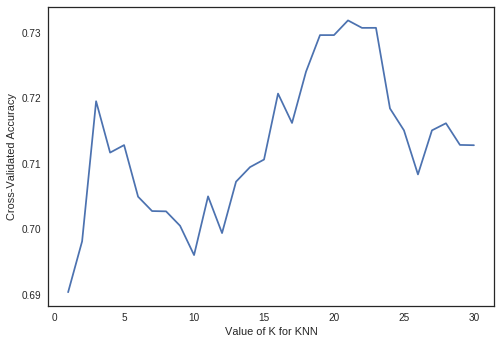

In [30]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [31]:
knn.best_score_

AttributeError: 'KNeighborsClassifier' object has no attribute 'best_score_'

We can see that the best accuracy with this model is with K=21. 

There's a tool we can use to test every combination for each parameters and find the best one : GridSearchCV. We feed it with the map of parameters we want it to test and then fit our data.

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


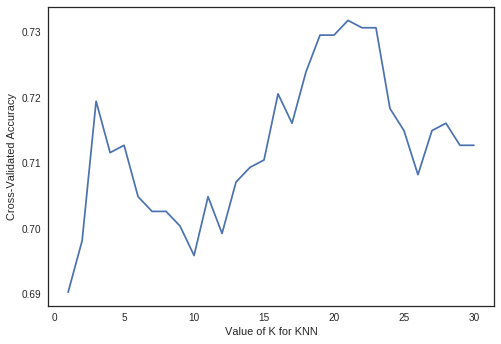

In [32]:
from sklearn.grid_search import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(train, targets)

grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')



We notice that this plot is the same as the previous one.

Alright now let's try a more complex model : Random forest classifier. Random forest uses decision trees. You can learn more about it here : https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm

Let's try it with the basic parameters : 

In [33]:
from sklearn.ensemble import RandomForestClassifier

rdc = RandomForestClassifier()
rdc.fit(train,targets)
rdc_score = compute_score(rdc,train,targets,scoring='accuracy')
rdc_score

0.79355117957491106

Now we use GridSearchCV to find the best combination of parameters : 

In [34]:
run_grid = False
if run_grid :
    param_grid = {'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],}
    grid = GridSearchCV(rdc, param_grid, cv=10, scoring='accuracy')
    grid.fit(train, targets)
    grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
    model = grid
    parameters = grid.best_params_
    print(grid.best_score_)
    print(grid.best_params_)
else : 
    parameters = {'bootstrap': False, 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 3,
              'min_samples_split': 3, 'n_estimators': 10}
    model = RandomForestClassifier(**parameters)
    model.fit(train,targets)

In [35]:
rfc_score = compute_score(model, train, targets, scoring='accuracy')
rfc_score

0.82607945210046019

82.8%, that's better ! This number is relative to the problem so we can't say if it is good or bad. The goal of data scientist is to improve this result by :
- creating new features
- try different models  such as Gradient Boosted trees, XGboost